In [36]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

SIZE = 10000

# datafile = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/sayak_full_svd|2025-04-29/data.json"
datafile = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/svd_100|2025-05-06/data.json"

# datafile = "/Users/brendan/Documents/projects/trails_project/julia/Paths/data/series/svd_data|2025-03-06/data.json"

In [37]:
# load the json, and normalize into a dataframe
with open(datafile) as f:
    df = pd.json_normalize(json.load(f), record_path=["snapshots"],
                           meta=[
                               ["settings", "patchImprovement"],
                               ["settings", "patchRecovery"],
                               ["settings", "maxCost"],
                               ["settings", "boundaryConditions"],
                               ["settings", "numLocations"],
                               ["settings", "randomSeedWalkers"],
                               ["settings", "randomSeedLocations"],
                            ])

# hopefully won't be necessary forever
# df["run_id"] = [i // 201 for i in range(df.shape[0])]

In [57]:
df["settings.randomSeedWalkers"].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], dtype=object)

In [58]:
df

,averageTravelCost,averageTravelLength,totalImprovement,thresholdImprovement,steps,paths,weightedHeadings,avgHeading,avgSquareHeading,patches,settings.patchImprovement,settings.patchRecovery,settings.maxCost,settings.boundaryConditions,settings.numLocations,settings.randomSeedWalkers,settings.randomSeedLocations,ratio
0,0.0,0.0,0.0,0.0,0,[],[],0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.2,0.002,2.0,SOLID,10,1,1,100.0
1,0.0,0.0,0.0,0.0,100,[],[],0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.2,0.002,2.0,SOLID,10,1,1,100.0
2,0.0,0.0,0.0,0.0,200,[],[],0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.2,0.002,2.0,SOLID,10,1,1,100.0
3,0.0,0.0,0.0,0.0,300,[],[],0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.2,0.002,2.0,SOLID,10,1,1,100.0
4,0.0,0.0,0.0,0.0,400,[],[],0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.2,0.002,2.0,SOLID,10,1,1,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40195,0.0,0.0,0.0,0.0,19600,[],[],0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.02,0.0002,2.0,SOLID,10,100,1,100.0
40196,0.0,0.0,0.0,0.0,19700,[],[],0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.02,0.0002,2.0,SOLID,10,100,1,100.0
40197,0.0,0.0,0.0,0.0,19800,[],[],0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.02,0.0002,2.0,SOLID,10,100,1,100.0
40198,0.0,0.0,0.0,0.0,19900,[],[],0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.02,0.0002,2.0,SOLID,10,100,1,100.0


In [39]:
df["ratio"] = df["settings.patchImprovement"] / df["settings.patchRecovery"]

In [38]:
df["settings.patchRecovery"].unique()

array([0.002, 0.0002], dtype=object)

In [40]:
df["ratio"].unique()

array([100.0], dtype=object)

In [41]:
def svd(df):
    patches = df["patches"]

    num_observations = len(patches)
    num_features = len(patches.iloc[0])
    # observations as rows, features as columns
    A = np.reshape(patches.explode(), (num_observations, num_features)).astype(float)
    # we actually *don't* want to demean A. they are already appropriately scaled and as centered as they need to be!
    # A = A - np.mean(A, axis=0)
    U, S, Vh = np.linalg.svd(A, full_matrices=False)

    # svd weight
    N = 100

    s = S**2/sum(S**2)
    plt.bar([x for x in range(N)], s[:N])
    plt.show()
    
    # plot the eigen-trails
    fig, axs = plt.subplots(2, 4)
    for i in range(8):
        ax = axs[i//4, i%4]
        ax.imshow(np.reshape(Vh[i], (100, 100)))
        ax.set_title(f"{i}:, {round(s[i], 3)}")

    return U, S, Vh

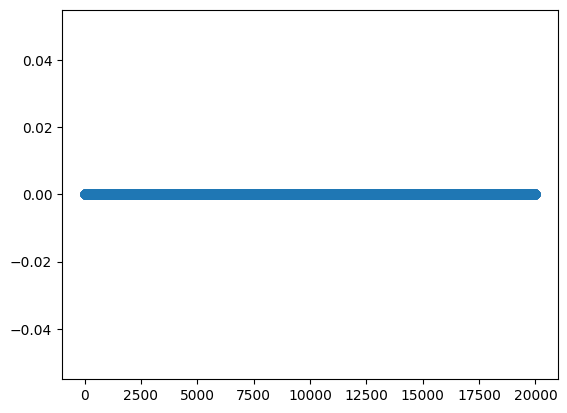

In [59]:
plt.scatter(
    data=df[(df["settings.patchRecovery"] == 0.0002) & (df["ratio"] == 100.0)],
    x="steps",
    y="totalImprovement")

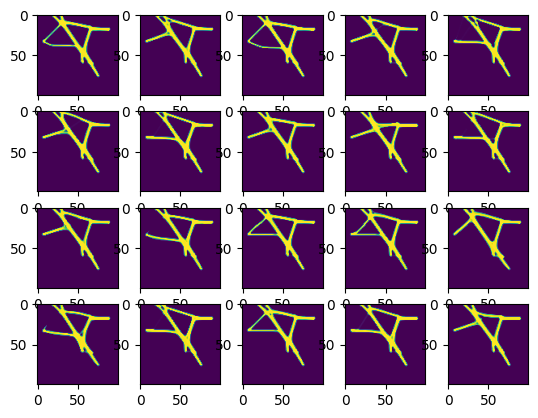

In [51]:
_finals = df[(df["steps"] == 20000) & (df["settings.patchRecovery"] == 0.0002) & (df["ratio"] == 100.0)]

fig, axs = plt.subplots(4, 5)
for i in range(20):
    ax = axs[i//5, i%5]
    ax.imshow(np.reshape(_finals["patches"].iloc[i], (100, 100)))

# for i in range(100):
#     plt.imshow(np.reshape(_finals["patches"].iloc[i], (100, 100)))
#     plt.show()

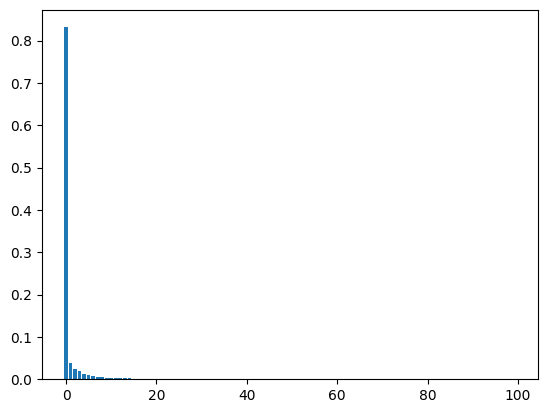

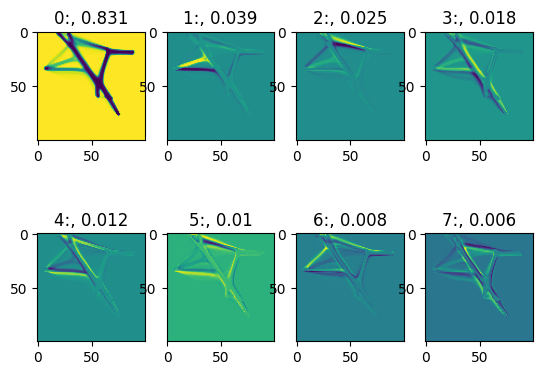

In [52]:
# just finals
U, S, Vh = svd(_finals)

In [ ]:
_finals = df[(df["steps"] == 20000) & (df["settings.patchRecovery"] == 0.0002)]

fig, axs = plt.subplots(4, 5)
for i in range(20):
    ax = axs[i//5, i%5]
    ax.imshow(np.reshape(_finals["patches"].iloc[i], (100, 100)))

# for i in range(100):
#     plt.imshow(np.reshape(_finals["patches"].iloc[i], (100, 100)))
#     plt.show()

In [ ]:
UU, SS, VVh = svd(df[(df["steps"] == 20000) & (df["settings.patchRecovery"] == 0.0002)]);

In [ ]:
# U, S, Vt = svd(df[(df["steps"] == 20000) & (df["settings.patchRecovery"] == 0.002)])

In [ ]:
# colors = ["red"] * 100 + ["blue"] * 100
# plt.scatter(U[:, 0], U[:, 1])

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# ax.scatter(U[:, 0], U[:, 1], U[:, 2], c=colors, alpha=0.5)

In [ ]:
U.shape

In [ ]:
patches = df[(df["steps"] == 20000) & (df["settings.patchRecovery"] == 0.002)]["patches"]

num_observations = len(patches)
num_features = len(patches.iloc[0])
# observations as rows, features as columns
A = np.reshape(patches.explode(), (num_observations, num_features)).astype(float)
# we actually *don't* want to demean A. they are already appropriately scaled and as centered as they need to be!
# A = A - np.mean(A, axis=0)
U, S, Vh = np.linalg.svd(A, full_matrices=False)
V = Vh.T

In [ ]:
S.shape

In [ ]:
for i in range(5):
    df[f"U{i}"] = df["patches"].map(lambda p: p @ V[:, i] / S[i])

In [ ]:
jdf = df[df["settings.patchRecovery"] == 0.002]

In [ ]:
# for i in range(5):
#     sns.lineplot(data=jdf[jdf["steps"] <= 20000], x="steps", y=f"U{i}", hue="run_id", alpha=0.5)
#     plt.show()

In [ ]:
# patches = df[(df["steps"] == 20000) & (df["settings.patchRecovery"] == 0.0002)]["patches"]

# num_observations = len(patches)
# num_features = len(patches.iloc[0])
# # observations as rows, features as columns
# A = np.reshape(patches.explode(), (num_observations, num_features)).astype(float)
# # we actually *don't* want to demean A. they are already appropriately scaled and as centered as they need to be!
# # A = A - np.mean(A, axis=0)
# U, S, Vh = np.linalg.svd(A, full_matrices=False)
# V = Vh.T

# for i in range(5):
#     df[f"U{i}"] = df["patches"].map(lambda p: p @ V[:, i] / S[i])

sdf = df[df["settings.patchRecovery"] == 0.0002]

for i in range(5):
    sns.lineplot(data=sdf[sdf["steps"] <= 20000], x="steps", y=f"U{i}", hue="run_id", alpha=0.5)
    plt.show()

In [ ]:
sns.relplot(data=sdf, x="U1", y="U2", hue="steps")